In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [7]:
import os

In [18]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from src.models.unet import UNet
from src.models.icnet import ICNet
import src.config as global_config
from src.data_access.folds_generation import FoldsGenerator
import src.data_access.config as data_access_config
from src.evaluation.losses.dice import dice_loss, bce_dice_loss
from src.training.training_advision import TrainingAdvisor
import src.training.config as training_config
from src.utils import fs_utils

In [28]:
def visualise_experiment_trainings(experiment_dir: str) -> None:
    for model_path in glob(os.path.join(experiment_dir, "*")):
        visualise_model_trainings(model_path=model_path)
        
        
def visualise_model_trainings(model_path: str) -> None:
    model_name = os.path.basename(model_path)
    for split_path in glob(os.path.join(model_path, "*")):
        visualise_model_training_on_split(
            split_path=split_path,
            model_name=model_name
        )
        
        
def visualise_model_training_on_split(split_path: str, 
                                      model_name: str
                                     ) -> None:
    split_name = os.path.basename(split_path)
    plot_save_path = os.path.join(split_path, "training_history.png")
    history_file = os.path.join(split_path, training_config.HISTORY_FILE_NAME)
    history = fs_utils.safe_parse_json(history_file)
    if history is None:
        return None
    train_loss = history["loss"]
    val_loss = history["val_loss"]
    x = np.arange(len(train_loss))
    plt.plot(x, train_loss, "-r", label="Dice + CE loss (train)")
    plt.plot(x, val_loss, "--b", label="Dice + CE loss (val)")
    plt.legend(loc="upper left")
    plt.xlabel("Epoch number")
    plt.ylabel("Loss")
    plt.title(f"Train history - {model_name}, {split_name}")
    plt.savefig(plot_save_path)
    plt.show()
    plot_save_path = os.path.join(split_path, "dice_metrics.png")
    train_dice = history["dice_loss"]
    val_dice = history["val_dice_loss"]
    plt.plot(x, train_dice, "-r", label="Dice score (train)")
    plt.plot(x, val_dice, "--b", label="Dice score(val)")
    plt.legend(loc="upper left")
    plt.xlabel("Epoch number")
    plt.ylabel("Dice")
    plt.title(f"Dice- {model_name}, {split_name}")
    plt.savefig(plot_save_path)
    plt.show()

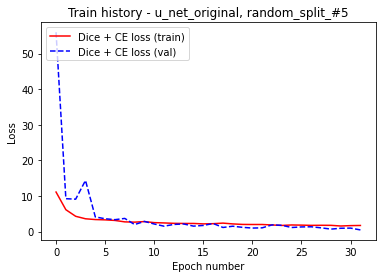

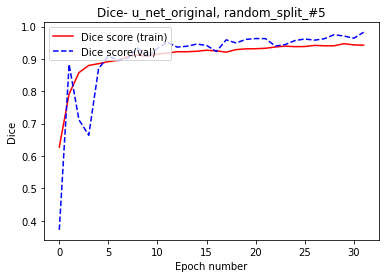

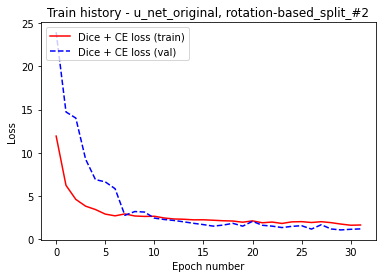

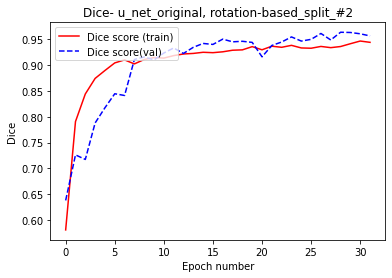

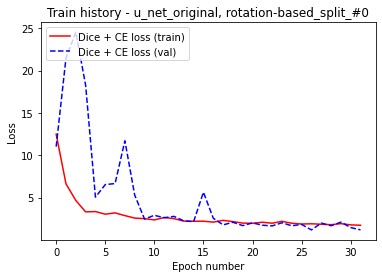

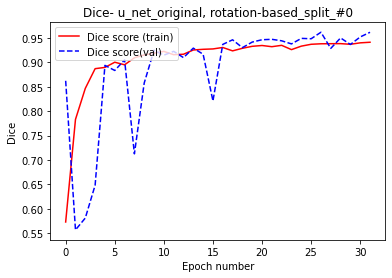

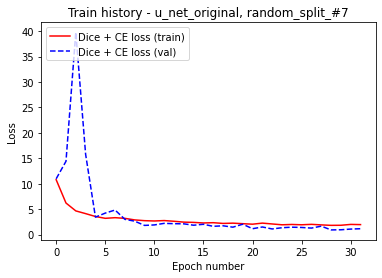

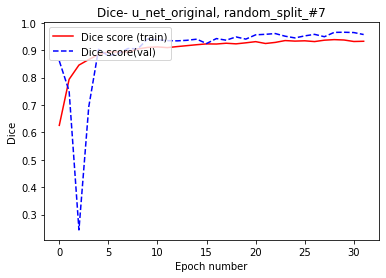

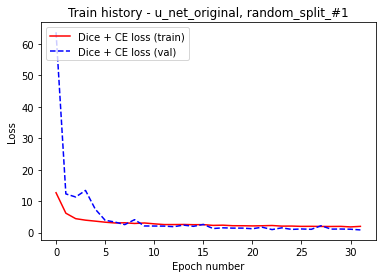

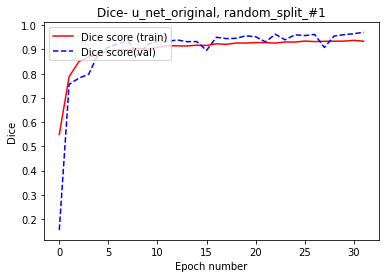

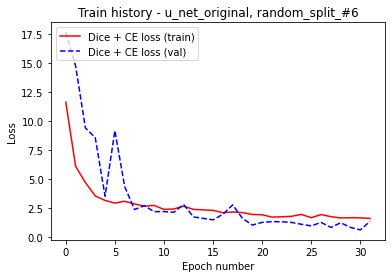

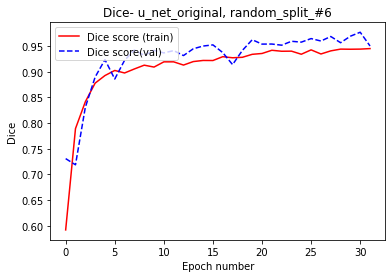

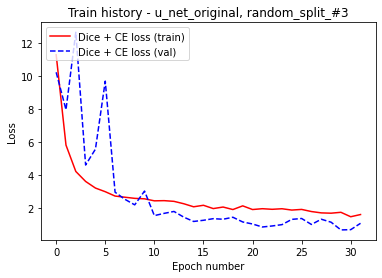

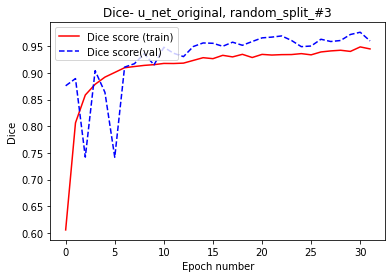

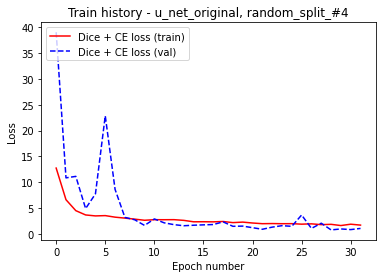

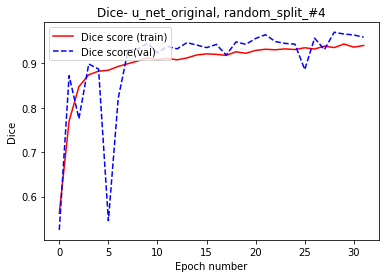

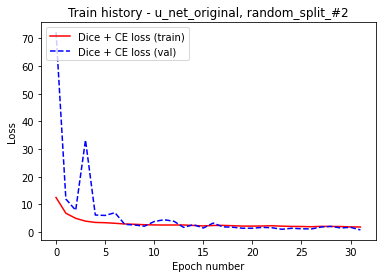

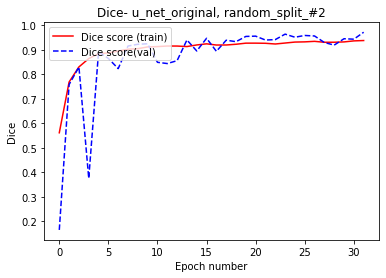

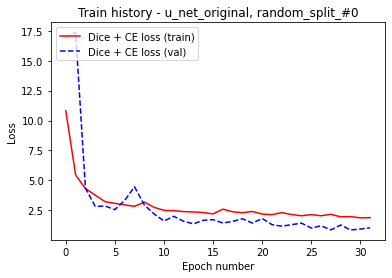

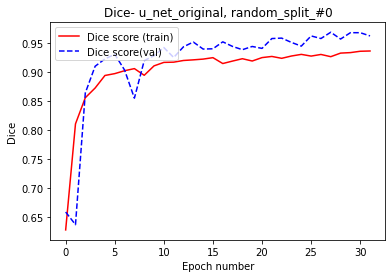

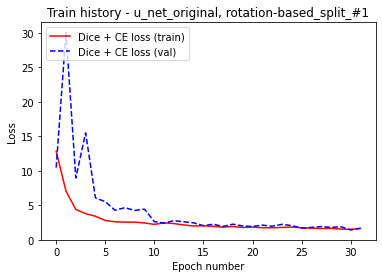

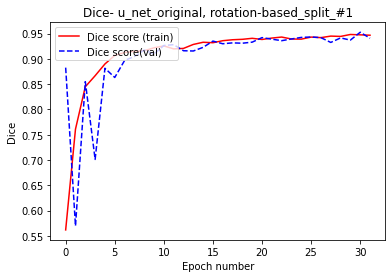

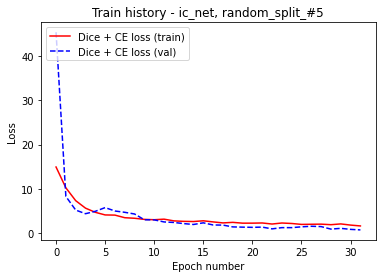

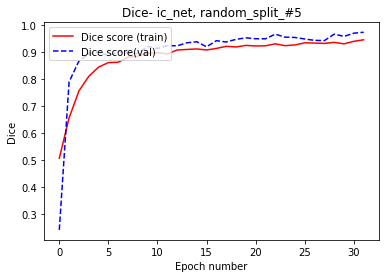

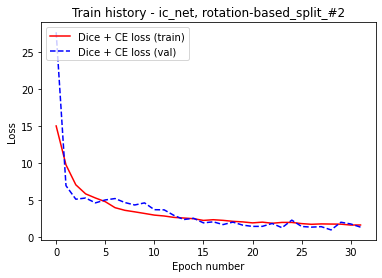

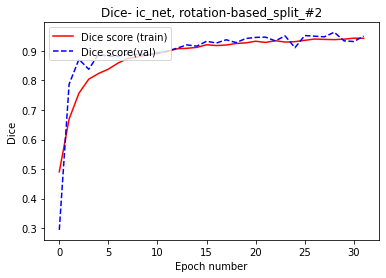

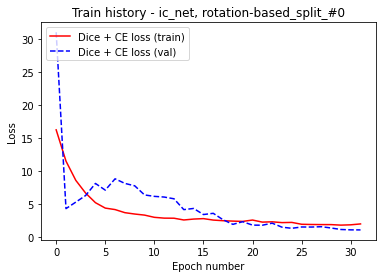

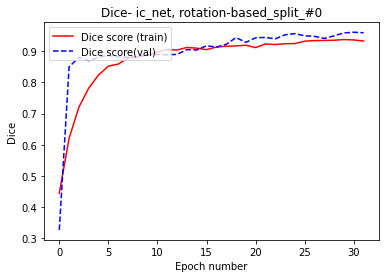

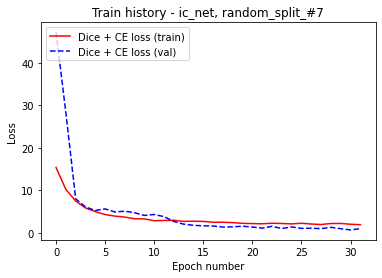

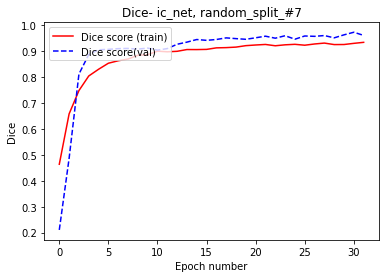

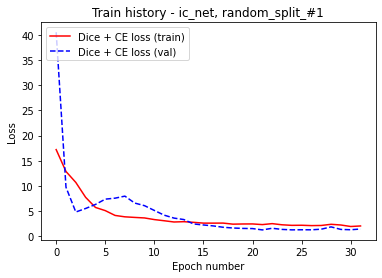

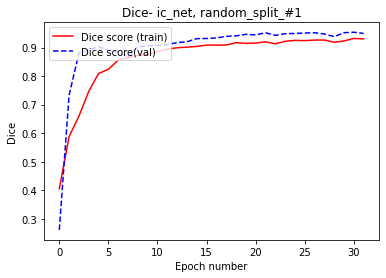

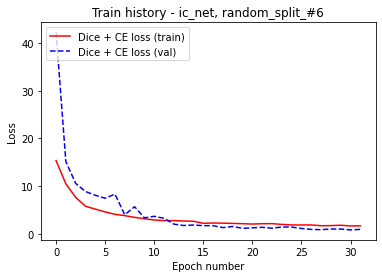

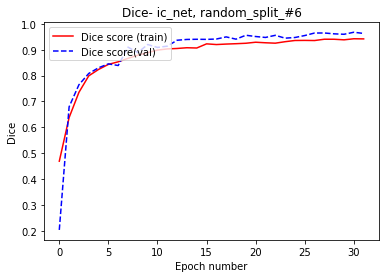

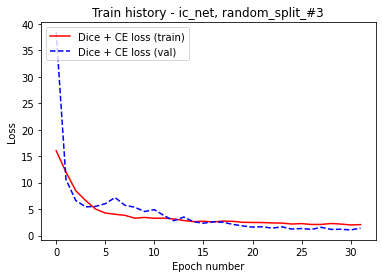

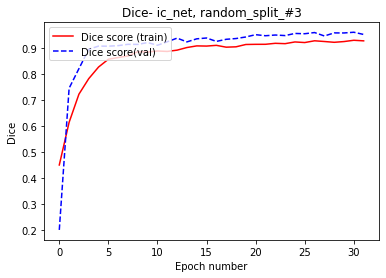

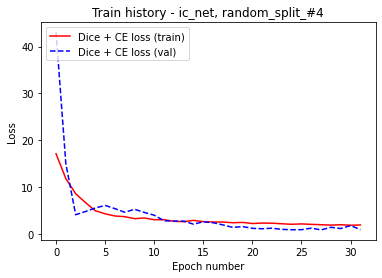

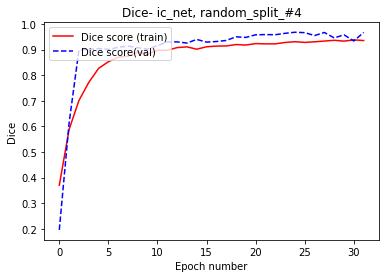

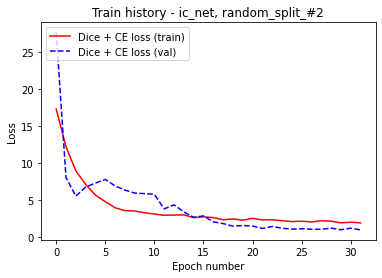

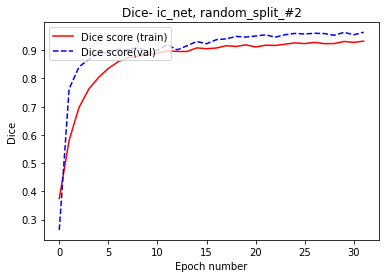

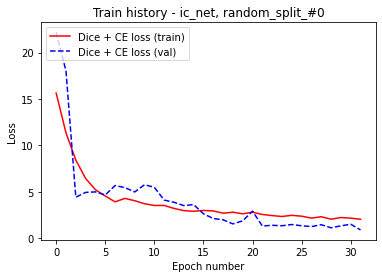

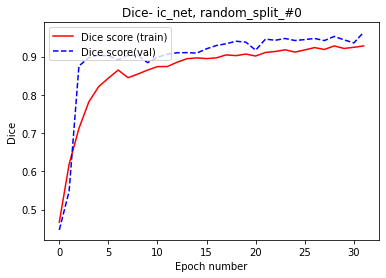

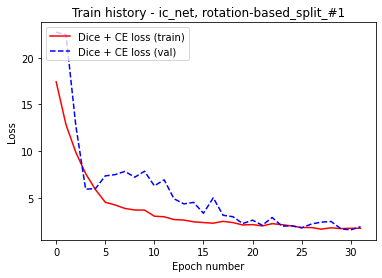

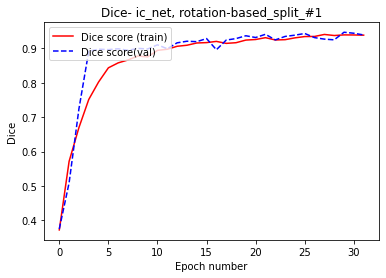

In [29]:
visualise_experiment_trainings(
    experiment_dir=os.path.join(global_config.EXPERIMENTS_OUTPUT_DIR, "test_experiment_v1")
)